# ML-Based Investor Profiling and Portfolio Recommendation System
## Exploratory Data Analysis Notebook

This notebook implements the EDA plan for the Investor Profiling project. It includes:
1. Data loading and cleaning
2. Feature engineering
3. Descriptive statistical analysis
4. Preparation for K-Means clustering

## 1. Import Required Libraries

In [2]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Configure visualizations
sns.set_theme()
%matplotlib inline

## 2. Load and Examine Survey Data

In [3]:
# Load the CSV file with survey data
file_path = 'investor_survey_data_with_timestamps.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(f"Dataset Shape: {df.shape}")
print(f"Number of responses: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (35, 38)
Number of responses: 35
Number of columns: 38

First 5 rows:


,Timestamp,Email address,1. Age,2. Gender,3. Educational Background,4. Location,5. Occupation,6. Monthly Income (in ₹),7. What percentage of your monthly income do you save/invest?,8. What is your primary financial goal?,...,27. When making financial decisions do you:,28. After making an investment if it performs poorly initially I would:,"29. When you think about the word ""risk"" in a financial context which of these first comes to mind?",30. What is more important to you?,31. Think about your worst investment decision. What was the primary reason it happened?,32. If you invest ₹10000 at 8% annual compound interest approximately how much will it be worth after 10 years?,33. If an investment's value increases from ₹1000 to ₹1200 in one year what is the percentage return?,34. When making important financial decisions do you typically:,35. During periods of high market volatility how do you manage your stress or anxiety about investments?,36. How strongly have your family's attitudes toward money influenced your investment approach?
0,10/15/2025 10:23:45,rajesh.sharma@gmail.com,36-45,Male,Master's Degree,Metro city (Delhi Mumbai Bangalore etc.),Salaried (Private sector),75001 - 150000,21% - 30%,Retirement planning,...,Prefer having many investment options to choos...,Hold it if I still believe in its long-term po...,Opportunity,Growing my investments over time,Insufficient research,₹21600,20%,Research thoroughly and deliberate before deci...,I seek more information/research to feel in co...,Somewhat
1,10/15/2025 11:45:22,priya.patel@yahoo.com,26-35,Female,Bachelor's Degree,Tier 2 city,Salaried (Private sector),30000 - 75000,10% - 20%,Buying a home,...,Feel overwhelmed by too many choices and prefe...,Seek professional advice,Danger,Protecting my investment principal,Following someone else's recommendation blindly,₹18000,12%,Gather some information and make a reasonably ...,I discuss with friends/family,Moderately
2,10/15/2025 13:10:37,amit.desai@hotmail.com,46-55,Male,Professional Degree (CA CS CFA etc.),Metro city (Delhi Mumbai Bangalore etc.),Business owner,Above 300000,More than 40%,Wealth accumulation,...,Prefer having many investment options to choos...,Buy more at the lower price,Opportunity,Growing my investments over time,Insufficient research,₹21600,20%,Research thoroughly and deliberate before deci...,I don't experience significant stress about in...,Very little
3,10/16/2025 09:23:14,sunita.agarwal@gmail.com,56-65,Female,Bachelor's Degree,Metro city (Delhi Mumbai Bangalore etc.),Retired,75001 - 150000,31% - 40%,Regular income generation,...,Feel overwhelmed by too many choices and prefe...,Seek professional advice,Danger,Generating regular income from investments,Market factors beyond control,₹21600,20%,Seek professional advice and then decide,I avoid checking my portfolio,Very strongly
4,10/16/2025 14:37:56,vikram.singh@yahoo.com,36-45,Male,Master's Degree,Tier 2 city,Salaried (Government/PSU),75001 - 150000,21% - 30%,Children's education,...,No strong preference,Hold it if I still believe in its long-term po...,Uncertainty,Protecting my investment principal,Market factors beyond control,₹21600,20%,Seek professional advice and then decide,I consult with financial advisors/experts,Moderately


In [4]:
# Check column names to understand what data we have
print("Column names in the dataset:")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")

Column names in the dataset:
1. Timestamp
2. Email address
3. 1. Age
4. 2. Gender
5. 3. Educational Background
6. 4. Location
7. 5. Occupation
8. 6. Monthly Income (in ₹)
9. 7. What percentage of your monthly income do you save/invest?
10. 8. What is your primary financial goal?
11. 9. What is your investment time horizon for your primary financial goal?
12. 10. Current distribution of your investments (Please enter percentages total should equal 100%)
13. 11. What is your current debt-to-income ratio?
14. 12. How many months of expenses do you have saved in your emergency fund?
15. 13. How would you describe your income stability?
16. 14. If your investment dropped 20% in value over a short period what would you do?
17. 15. Which statement best describes your investment approach?
18. 16. For an investment that has potential for higher returns but also higher risk what percentage of your portfolio would you allocate?
19. 17. Rate your agreement with this statement: "I am willing to acc

## 3. Data Cleaning and Preparation (Section 1.1 & 1.2 of EDA Plan)

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

# Check data types
print("\nData Types:")
print(df.dtypes)

# Generate summary statistics for numerical columns
print("\nSummary Statistics:")
df.describe().T

Missing values per column:
Series([], dtype: int64)

Data Types:
Timestamp                                                                                                                                        object
Email address                                                                                                                                    object
1. Age                                                                                                                                           object
2. Gender                                                                                                                                        object
3. Educational Background                                                                                                                        object
4. Location                                                                                                                                      object
5. Occupation          

,count,unique,top,freq
Timestamp,35,35,10/15/2025 10:23:45,1
Email address,35,35,rajesh.sharma@gmail.com,1
1. Age,35,5,36-45,12
2. Gender,35,2,Male,18
3. Educational Background,35,4,Bachelor's Degree,17
4. Location,35,2,Metro city (Delhi Mumbai Bangalore etc.),21
5. Occupation,35,7,Salaried (Private sector),18
6. Monthly Income (in ₹),35,5,75001 - 150000,15
7. What percentage of your monthly income do you save/invest?,35,5,21% - 30%,15
8. What is your primary financial goal?,35,6,Wealth accumulation,9


In [6]:
# Handle missing values (if any)
# This is a placeholder - customize based on your data
df_cleaned = df.copy()

# For demonstration, we'll fill numeric missing values with median
# and categorical missing values with mode
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

for column in numeric_columns:
    if df_cleaned[column].isnull().sum() > 0:
        median_value = df_cleaned[column].median()
        df_cleaned[column].fillna(median_value, inplace=True)

for column in categorical_columns:
    if df_cleaned[column].isnull().sum() > 0:
        mode_value = df_cleaned[column].mode()[0]
        df_cleaned[column].fillna(mode_value, inplace=True)

# Check if missing values were handled
print("Missing values after cleaning:")
print(df_cleaned.isnull().sum().sum())

Missing values after cleaning:
0


## 4. Feature Engineering (Section 1.3 of EDA Plan)

In [11]:
# Create a composite risk score based on specific questions
# Looking at survey columns that directly relate to risk tolerance
risk_questions = [
    '14. If your investment dropped 20% in value over a short period what would you do?',
    '15. Which statement best describes your investment approach?',
    '16. For an investment that has potential for higher returns but also higher risk what percentage of your portfolio would you allocate?',
    '17. Rate your agreement with this statement: "I am willing to accept significant short-term losses for potentially higher long-term returns."',
    '18. Which scenario would you prefer?',
    '19. If you had ₹100000 to invest which option would you choose?'
]

# Check if these columns exist in our dataset
existing_risk_columns = [col for col in risk_questions if col in df_cleaned.columns]
print(f"Found {len(existing_risk_columns)} risk-related questions in the dataset")

if existing_risk_columns:
    # Create a mapping for risk scores based on answers to each question
    # Question 14: Response to market drop
    q14_map = {
        'Sell everything to avoid further losses': 0,
        'Sell a portion to reduce risk': 1,
        'Become concerned but take no action': 2,
        'Do nothing and wait for recovery': 3,
        'Buy more at the lower price': 4
    }
    
    # Question 15: Investment approach
    q15_map = {
        'I prefer guaranteed returns even if they are low': 0,
        'I prefer a mix of stable and growth investments': 2,
        'I prefer growth investments even with higher volatility': 3,
        'I seek maximum growth and can accept significant volatility': 4
    }
    
    # Question 16: Risk allocation percentage
    q16_map = {
        'Less than 1%': 0,
        '1% - 25%': 1,
        '26% - 50%': 2,
        '51% - 75%': 3,
        'More than 75%': 4
    }
    
    # Question 17: Agreement with risk statement
    q17_map = {
        'Strongly disagree': 0,
        'Disagree': 1,
        'Neither agree nor disagree': 2,
        'Agree': 3,
        'Strongly agree': 4
    }
    
    # Question 18: Investment scenario preference
    q18_map = {
        'Investment A: 7% average annual return with minimal fluctuations': 1,
        'Investment B: 10% average annual return with moderate fluctuations': 2,
        'Investment C: 13% average annual return with significant fluctuations': 3
    }
    
    # Question 19: Investment choice
    q19_map = {
        'A guaranteed return of ₹5000 (5%)': 1,
        '50% chance of earning ₹12000 and 50% chance of earning ₹2000': 2,
        '30% chance of earning ₹25000 and 70% chance of earning ₹0': 3
    }
    
    # Apply mappings to create risk scores for each question
    if '14. If your investment dropped 20% in value over a short period what would you do?' in df_cleaned.columns:
        df_cleaned['risk_score_q14'] = df_cleaned['14. If your investment dropped 20% in value over a short period what would you do?'].map(q14_map)
    
    if '15. Which statement best describes your investment approach?' in df_cleaned.columns:
        df_cleaned['risk_score_q15'] = df_cleaned['15. Which statement best describes your investment approach?'].map(q15_map)
    
    if '16. For an investment that has potential for higher returns but also higher risk what percentage of your portfolio would you allocate?' in df_cleaned.columns:
        df_cleaned['risk_score_q16'] = df_cleaned['16. For an investment that has potential for higher returns but also higher risk what percentage of your portfolio would you allocate?'].map(q16_map)
    
    if '17. Rate your agreement with this statement: "I am willing to accept significant short-term losses for potentially higher long-term returns."' in df_cleaned.columns:
        df_cleaned['risk_score_q17'] = df_cleaned['17. Rate your agreement with this statement: "I am willing to accept significant short-term losses for potentially higher long-term returns."'].map(q17_map)
    
    if '18. Which scenario would you prefer?' in df_cleaned.columns:
        df_cleaned['risk_score_q18'] = df_cleaned['18. Which scenario would you prefer?'].map(q18_map)
    
    if '19. If you had ₹100000 to invest which option would you choose?' in df_cleaned.columns:
        df_cleaned['risk_score_q19'] = df_cleaned['19. If you had ₹100000 to invest which option would you choose?'].map(q19_map)
    
    # Calculate composite risk score (average of all individual risk scores)
    risk_score_columns = [col for col in df_cleaned.columns if col.startswith('risk_score_q')]
    if risk_score_columns:
        df_cleaned['composite_risk_score'] = df_cleaned[risk_score_columns].mean(axis=1)
        print(f"Created composite risk score from {len(risk_score_columns)} questions")
        
        # Normalize to 0-100 scale for easier interpretation
        min_risk = df_cleaned['composite_risk_score'].min()
        max_risk = df_cleaned['composite_risk_score'].max()
        df_cleaned['risk_score_normalized'] = ((df_cleaned['composite_risk_score'] - min_risk) / 
                                          (max_risk - min_risk)) * 100
        
        # Basic stats on risk score
        print("\nRisk Score Statistics:")
        print(df_cleaned['risk_score_normalized'].describe())
else:
    print("No risk-related questions found in the dataset")

Found 6 risk-related questions in the dataset
Created composite risk score from 6 questions

Risk Score Statistics:
count     35.000000
mean      44.130435
std       29.406024
min        0.000000
25%       10.326087
50%       51.086957
75%       56.521739
max      100.000000
Name: risk_score_normalized, dtype: float64


In [8]:
# Create age-income-education groups (demographic segmentation)
# Note: Customize these column names to match your actual data

# Example for categorical variables
# Convert age ranges to ordered categories if applicable
if 'age_group' in df_cleaned.columns:
    age_order = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
    df_cleaned['age_ordinal'] = pd.Categorical(
        df_cleaned['age_group'],
        categories=age_order,
        ordered=True
    ).codes
    
# Create investment experience proxy
# Again, customize based on your actual columns
experience_columns = [col for col in df_cleaned.columns if 'experience' in col.lower()]
if len(experience_columns) > 0:
    print("Creating investment experience index using:", experience_columns)
    # This is a simplified example
    for col in experience_columns:
        if df_cleaned[col].dtype in ['int64', 'float64']:
            df_cleaned['investment_experience_index'] = df_cleaned[col]
            break
else:
    print("No experience-related columns found")

No experience-related columns found


## 5. Descriptive Statistical Analysis (Section 2 of EDA Plan)

### 5.1 Demographic Analysis

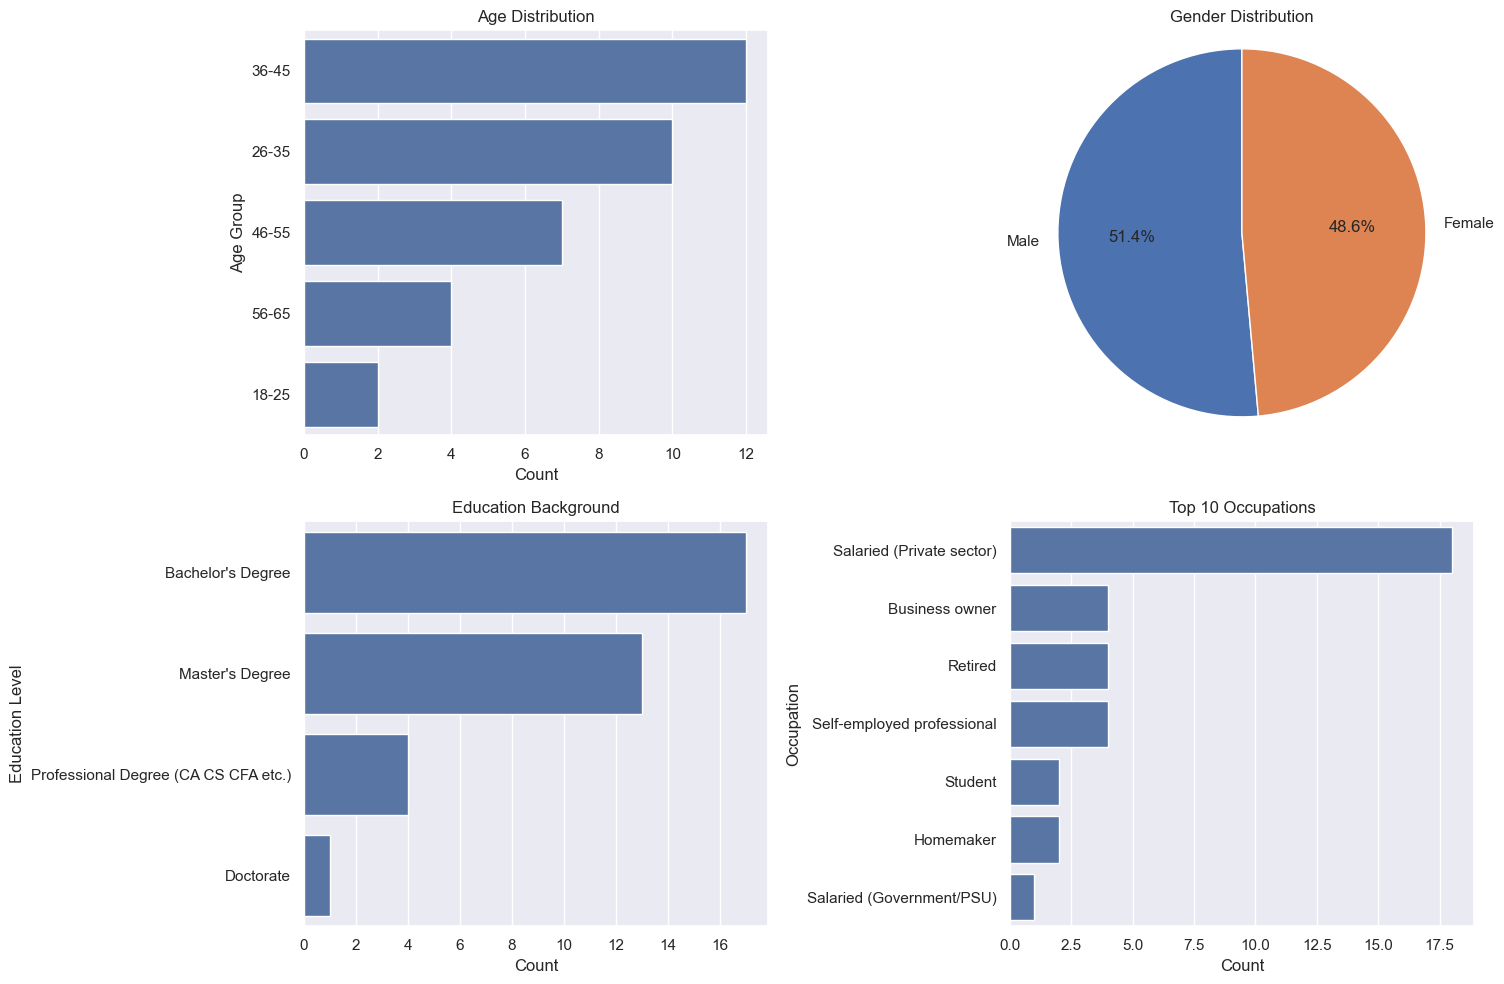

In [9]:
# Create visualizations for demographic information
plt.figure(figsize=(15, 10))

# Example 1: Age distribution (adjust column name as needed)
age_column = next((col for col in df_cleaned.columns if 'age' in col.lower()), None)
if age_column:
    plt.subplot(2, 2, 1)
    if df_cleaned[age_column].dtype == 'object':
        # For categorical age ranges
        sns.countplot(y=age_column, data=df_cleaned)
        plt.title('Age Distribution')
        plt.xlabel('Count')
        plt.ylabel('Age Group')
    else:
        # For numerical age
        sns.histplot(df_cleaned[age_column], kde=True)
        plt.title('Age Distribution')
        plt.xlabel('Age')
        plt.ylabel('Count')

# Example 2: Gender distribution (adjust column name as needed)
gender_column = next((col for col in df_cleaned.columns if 'gender' in col.lower()), None)
if gender_column:
    plt.subplot(2, 2, 2)
    gender_counts = df_cleaned[gender_column].value_counts()
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Gender Distribution')

# Example 3: Education distribution (adjust column name as needed)
education_column = next((col for col in df_cleaned.columns if 'education' in col.lower() or 'qualification' in col.lower()), None)
if education_column:
    plt.subplot(2, 2, 3)
    education_counts = df_cleaned[education_column].value_counts()
    sns.barplot(x=education_counts.values, y=education_counts.index)
    plt.title('Education Background')
    plt.xlabel('Count')
    plt.ylabel('Education Level')

# Example 4: Occupation distribution (adjust column name as needed)
occupation_column = next((col for col in df_cleaned.columns if 'occupation' in col.lower() or 'profession' in col.lower()), None)
if occupation_column:
    plt.subplot(2, 2, 4)
    occupation_counts = df_cleaned[occupation_column].value_counts().head(10)  # Top 10 occupations
    sns.barplot(x=occupation_counts.values, y=occupation_counts.index)
    plt.title('Top 10 Occupations')
    plt.xlabel('Count')
    plt.ylabel('Occupation')

plt.tight_layout()
plt.show()

### 5.2 Financial Profile Analysis

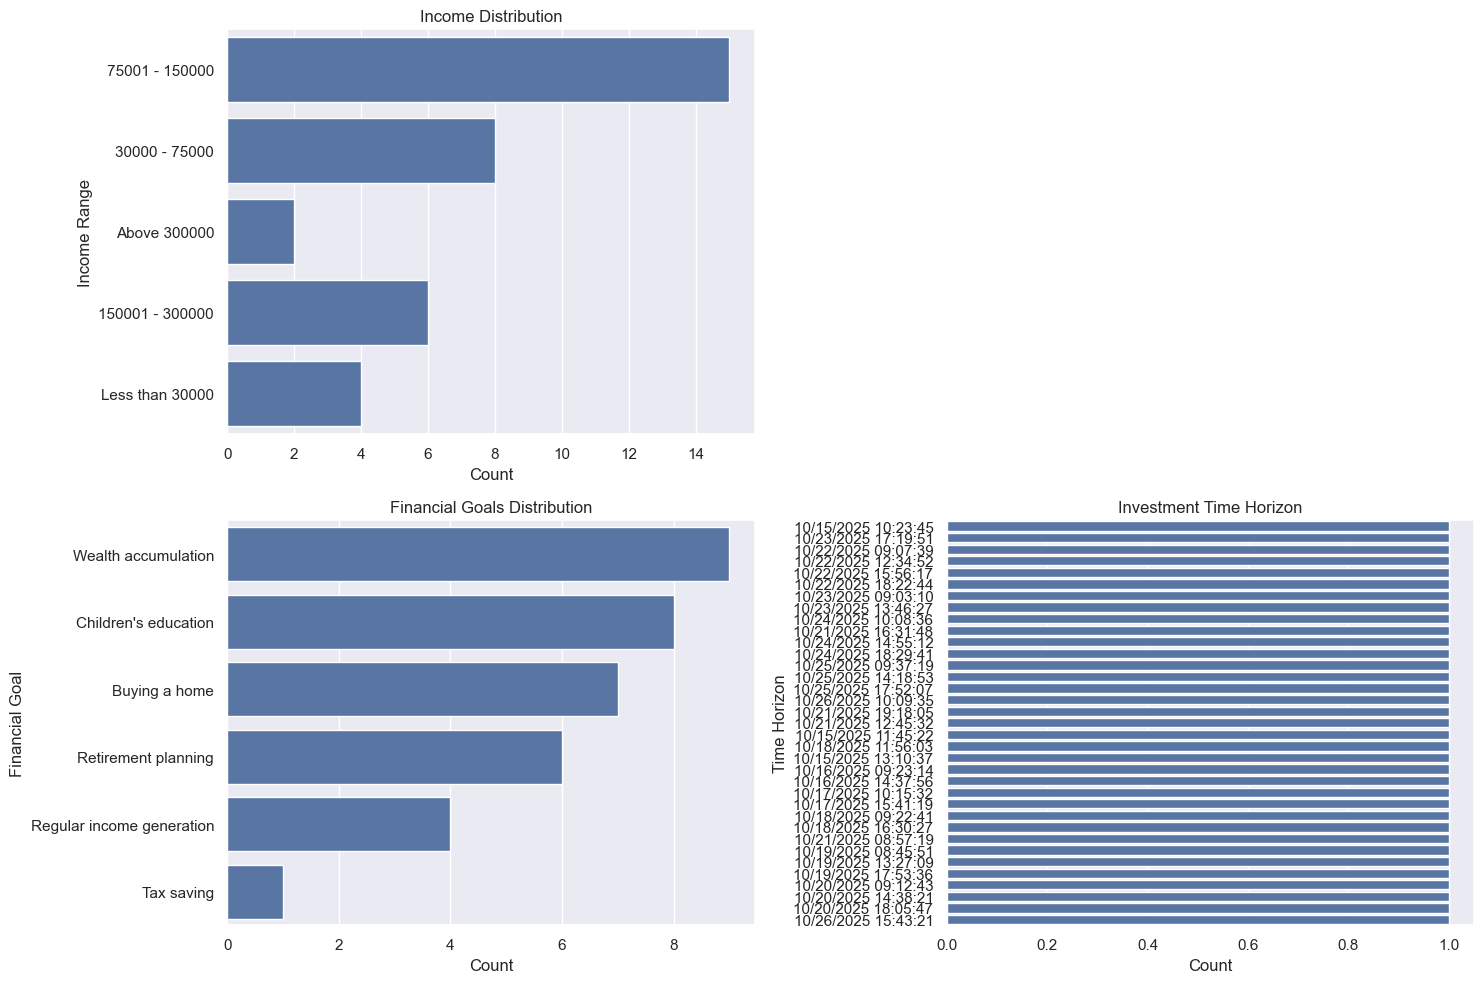

In [10]:
# Create visualizations for financial profile information
plt.figure(figsize=(15, 10))

# Example 1: Income distribution (adjust column name as needed)
income_column = next((col for col in df_cleaned.columns if 'income' in col.lower()), None)
if income_column:
    plt.subplot(2, 2, 1)
    if df_cleaned[income_column].dtype == 'object':
        # For categorical income ranges
        sns.countplot(y=income_column, data=df_cleaned)
        plt.title('Income Distribution')
        plt.xlabel('Count')
        plt.ylabel('Income Range')
    else:
        # For numerical income
        sns.histplot(df_cleaned[income_column], kde=True)
        plt.title('Income Distribution')
        plt.xlabel('Income')
        plt.ylabel('Count')

# Example 2: Savings rate patterns (adjust column name as needed)
savings_column = next((col for col in df_cleaned.columns if 'saving' in col.lower()), None)
if savings_column and age_column:
    plt.subplot(2, 2, 2)
    if df_cleaned[savings_column].dtype != 'object' and df_cleaned[age_column].dtype == 'object':
        sns.boxplot(x=age_column, y=savings_column, data=df_cleaned)
        plt.title('Savings Rate by Age Group')
        plt.xlabel('Age Group')
        plt.ylabel('Savings Rate (%)')
        plt.xticks(rotation=45)

# Example 3: Financial goals distribution (adjust column name as needed)
goals_column = next((col for col in df_cleaned.columns if 'goal' in col.lower()), None)
if goals_column:
    plt.subplot(2, 2, 3)
    if df_cleaned[goals_column].dtype == 'object':
        goals_counts = df_cleaned[goals_column].value_counts()
        sns.barplot(x=goals_counts.values, y=goals_counts.index)
        plt.title('Financial Goals Distribution')
        plt.xlabel('Count')
        plt.ylabel('Financial Goal')

# Example 4: Investment time horizon analysis (adjust column name as needed)
horizon_column = next((col for col in df_cleaned.columns if 'horizon' in col.lower() or 'time' in col.lower()), None)
if horizon_column:
    plt.subplot(2, 2, 4)
    if df_cleaned[horizon_column].dtype == 'object':
        horizon_counts = df_cleaned[horizon_column].value_counts()
        sns.barplot(x=horizon_counts.values, y=horizon_counts.index)
        plt.title('Investment Time Horizon')
        plt.xlabel('Count')
        plt.ylabel('Time Horizon')

plt.tight_layout()
plt.show()

# Analyze risk tolerance distribution and factors
if 'risk_score_normalized' in df_cleaned.columns:
    plt.figure(figsize=(15, 12))
    
    # 1. Risk score distribution
    plt.subplot(2, 2, 1)
    sns.histplot(df_cleaned['risk_score_normalized'], kde=True, bins=10)
    plt.axvline(x=33, color='r', linestyle='--')
    plt.axvline(x=66, color='r', linestyle='--')
    plt.title('Risk Tolerance Score Distribution')
    plt.xlabel('Risk Score (0-100)')
    plt.ylabel('Count')
    plt.annotate('Low Risk Tolerance', xy=(16, 0), xytext=(16, 1), color='blue')
    plt.annotate('Medium Risk Tolerance', xy=(49, 0), xytext=(49, 1), color='green')
    plt.annotate('High Risk Tolerance', xy=(82, 0), xytext=(82, 1), color='red')
    
    # 2. Risk score by age group
    age_column = '1. Age'
    if age_column in df_cleaned.columns:
        plt.subplot(2, 2, 2)
        sns.boxplot(x=age_column, y='risk_score_normalized', data=df_cleaned)
        plt.title('Risk Tolerance by Age Group')
        plt.xlabel('Age Group')
        plt.ylabel('Risk Score (0-100)')
        plt.xticks(rotation=45)
    
    # 3. Risk score by gender
    gender_column = '2. Gender'
    if gender_column in df_cleaned.columns:
        plt.subplot(2, 2, 3)
        sns.boxplot(x=gender_column, y='risk_score_normalized', data=df_cleaned)
        plt.title('Risk Tolerance by Gender')
        plt.xlabel('Gender')
        plt.ylabel('Risk Score (0-100)')
    
    # 4. Risk score by education
    education_column = '3. Educational Background'
    if education_column in df_cleaned.columns:
        plt.subplot(2, 2, 4)
        sns.boxplot(x=education_column, y='risk_score_normalized', data=df_cleaned)
        plt.title('Risk Tolerance by Education')
        plt.xlabel('Education')
        plt.ylabel('Risk Score (0-100)')
        plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()
    
    # Additional Analysis: Risk score by income
    income_column = '6. Monthly Income (in ₹)'
    if income_column in df_cleaned.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=income_column, y='risk_score_normalized', data=df_cleaned)
        plt.title('Risk Tolerance by Monthly Income')
        plt.xlabel('Monthly Income Range (₹)')
        plt.ylabel('Risk Score (0-100)')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
        
    # Print out risk tolerance groups
    df_cleaned['risk_category'] = pd.cut(
        df_cleaned['risk_score_normalized'], 
        bins=[0, 33, 66, 100], 
        labels=['Conservative', 'Balanced', 'Aggressive']
    )
    
    risk_category_counts = df_cleaned['risk_category'].value_counts()
    print("Risk Category Distribution:")
    print(risk_category_counts)
    print("\nPercentage Distribution:")
    print(risk_category_counts / len(df_cleaned) * 100)
    
else:
    print("Risk score not available for analysis")

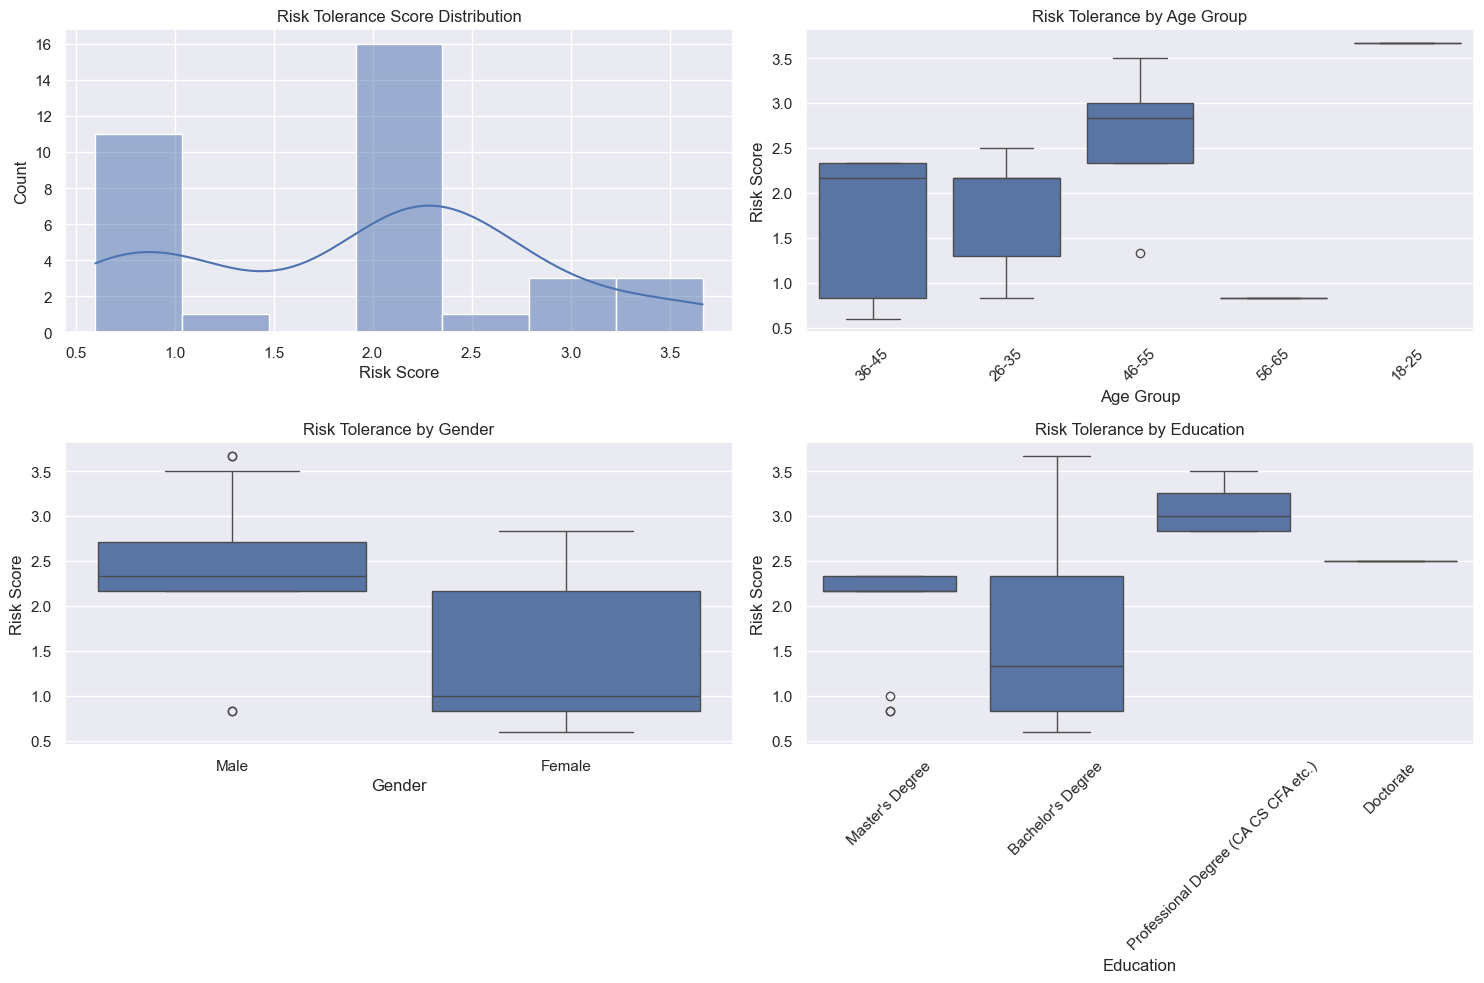

In [12]:
# Analyze risk tolerance (if composite_risk_score was created successfully)
if 'composite_risk_score' in df_cleaned.columns:
    plt.figure(figsize=(15, 10))
    
    # Example 1: Risk score distribution
    plt.subplot(2, 2, 1)
    sns.histplot(df_cleaned['composite_risk_score'], kde=True)
    plt.title('Risk Tolerance Score Distribution')
    plt.xlabel('Risk Score')
    plt.ylabel('Count')
    
    # Example 2: Risk tolerance by age group
    if age_column:
        plt.subplot(2, 2, 2)
        sns.boxplot(x=age_column, y='composite_risk_score', data=df_cleaned)
        plt.title('Risk Tolerance by Age Group')
        plt.xlabel('Age Group')
        plt.ylabel('Risk Score')
        plt.xticks(rotation=45)
    
    # Example 3: Risk tolerance by gender
    if gender_column:
        plt.subplot(2, 2, 3)
        sns.boxplot(x=gender_column, y='composite_risk_score', data=df_cleaned)
        plt.title('Risk Tolerance by Gender')
        plt.xlabel('Gender')
        plt.ylabel('Risk Score')
    
    # Example 4: Risk tolerance by education
    if education_column:
        plt.subplot(2, 2, 4)
        sns.boxplot(x=education_column, y='composite_risk_score', data=df_cleaned)
        plt.title('Risk Tolerance by Education')
        plt.xlabel('Education')
        plt.ylabel('Risk Score')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print("Composite risk score not available for analysis")

## 6. Advanced Statistical Analysis (Section 3 of EDA Plan)

### 6.1 Correlation Analysis

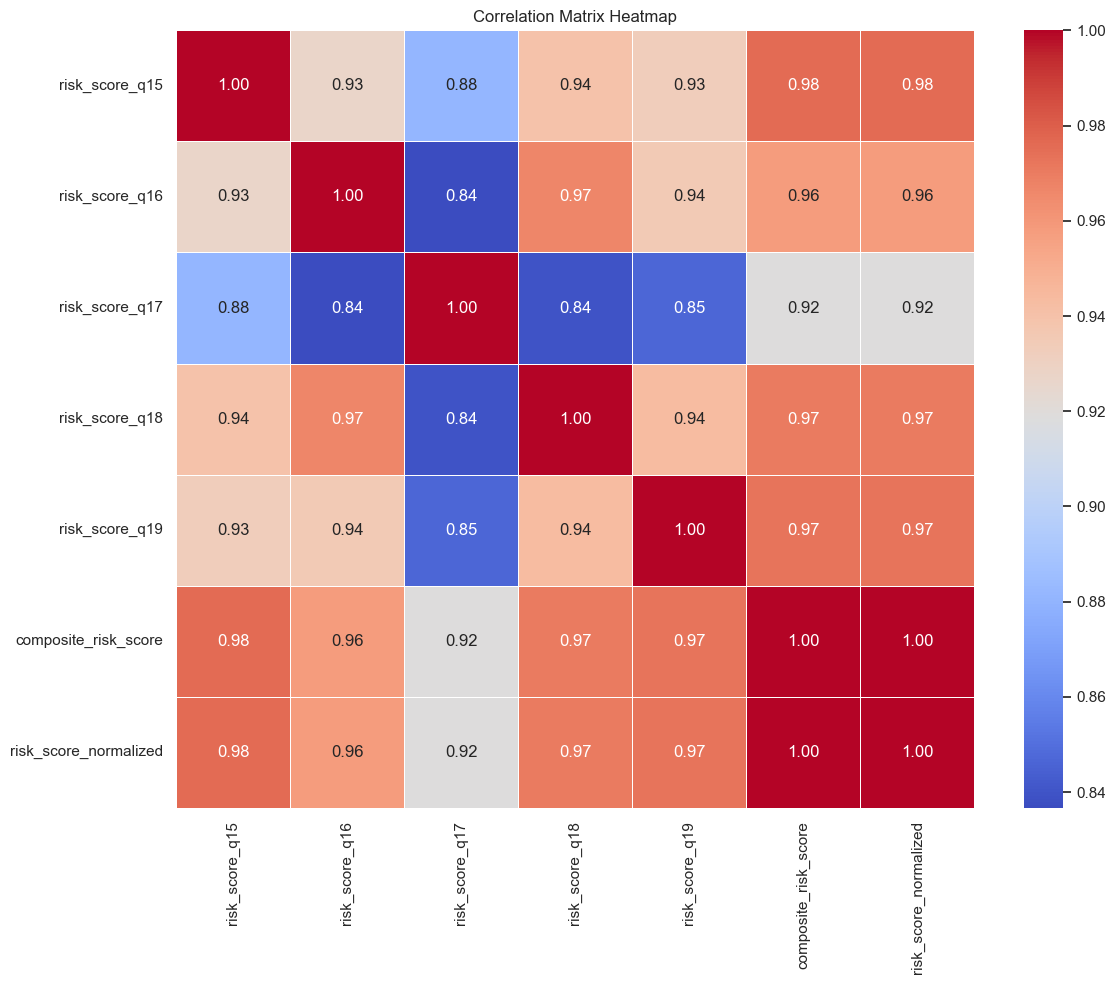

Top 10 strongest correlations:
risk_score_normalized ~ composite_risk_score: 1.000
composite_risk_score ~ risk_score_normalized: 1.000
risk_score_q15 ~ risk_score_normalized: 0.976
risk_score_normalized ~ risk_score_q15: 0.976
risk_score_q15 ~ composite_risk_score: 0.976
composite_risk_score ~ risk_score_q15: 0.976
composite_risk_score ~ risk_score_q19: 0.973
risk_score_q19 ~ composite_risk_score: 0.973
risk_score_normalized ~ risk_score_q19: 0.973
risk_score_q19 ~ risk_score_normalized: 0.973


In [13]:
# Select numerical columns for correlation analysis
numerical_df = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Drop columns with NaN values if any
numerical_df = numerical_df.dropna(axis=1)

if numerical_df.shape[1] > 1:  # Only proceed if we have at least 2 numerical columns
    # Calculate correlation matrix
    corr_matrix = numerical_df.corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix Heatmap')
    plt.tight_layout()
    plt.show()
    
    # Identify strongest correlations (absolute value)
    corr_pairs = corr_matrix.unstack()
    corr_pairs = corr_pairs[corr_pairs != 1.0]  # Remove self-correlations
    strongest_corrs = corr_pairs.abs().sort_values(ascending=False)[:10]  # Top 10
    print("Top 10 strongest correlations:")
    for idx, value in strongest_corrs.items():
        var1, var2 = idx
        print(f"{var1} ~ {var2}: {corr_matrix.loc[var1, var2]:.3f}")
else:
    print("Not enough numerical variables for correlation analysis")

### 6.2 Dimensionality Reduction with PCA

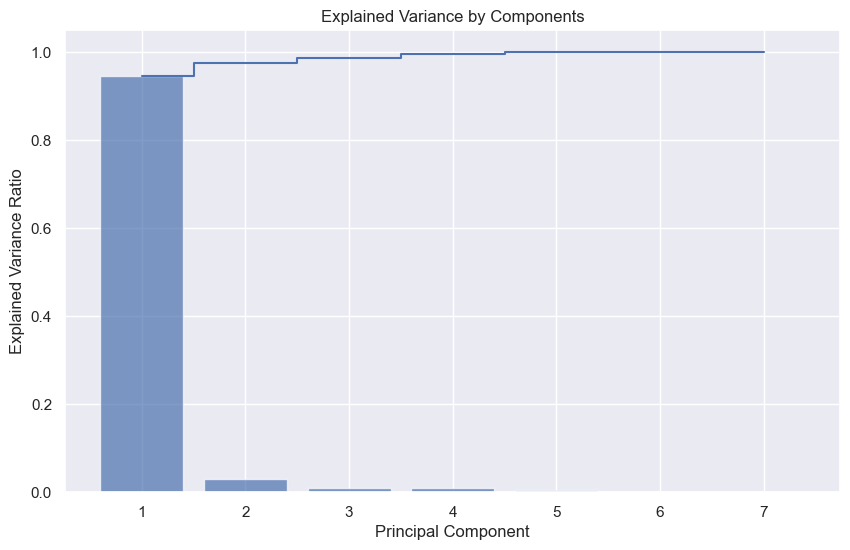

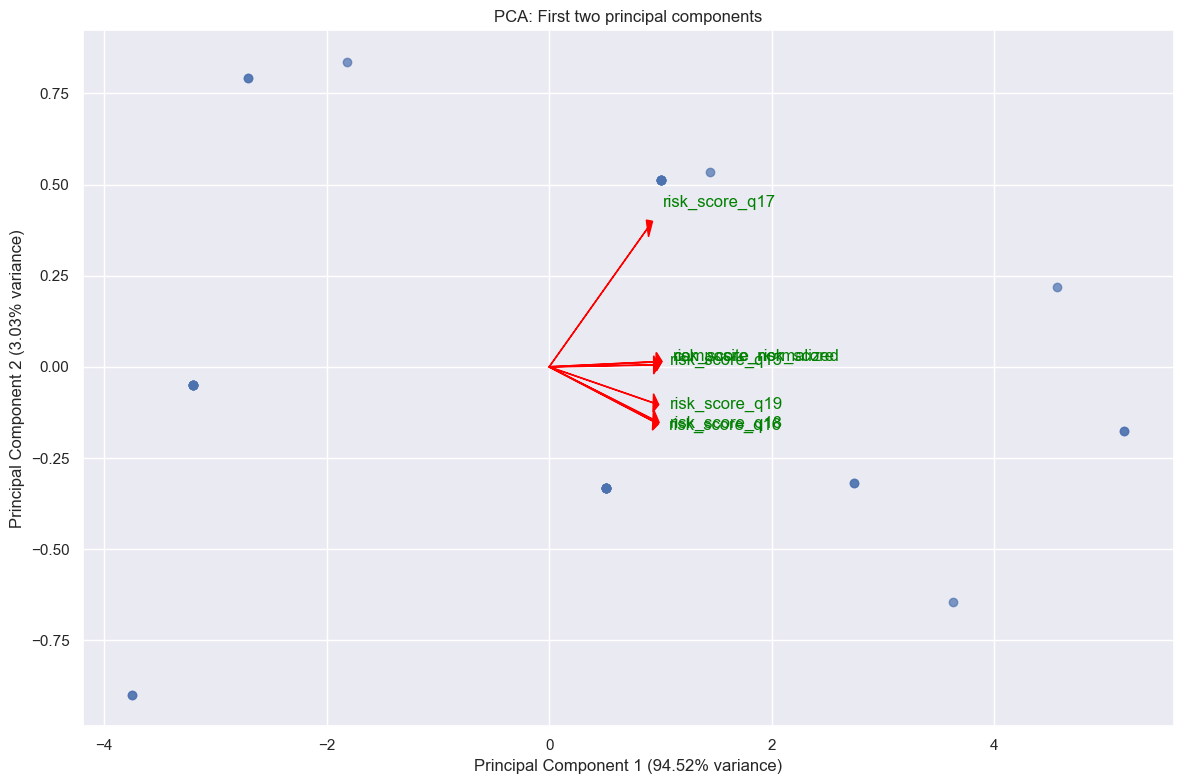

In [14]:
# Perform PCA on numerical features
if numerical_df.shape[1] >= 3:  # Need at least 3 variables for meaningful PCA
    # Standardize the data (important for PCA)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numerical_df)
    
    # Apply PCA
    pca = PCA()
    pca_data = pca.fit_transform(scaled_data)
    
    # Explained variance ratio
    explained_variance = pca.explained_variance_ratio_
    
    # Plot explained variance
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
    plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Components')
    plt.grid(True)
    plt.show()
    
    # Plot first two principal components
    plt.figure(figsize=(12, 8))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.7)
    plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)')
    plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)')
    plt.title('PCA: First two principal components')
    plt.grid(True)
    
    # Add feature loading vectors
    feature_names = numerical_df.columns
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.05, head_length=0.05, 
                 fc='red', ec='red', length_includes_head=True)
        plt.text(loadings[i, 0] * 1.1, loadings[i, 1] * 1.1, feature, color='green')
    
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numerical variables for meaningful PCA")

## 7. Prepare for K-Means Clustering (Section 4 of EDA Plan)

### 7.1 Feature Selection for Clustering

In [15]:
# Select and prepare features for clustering
# This requires domain knowledge and understanding of your specific data
# Below is a template to adapt to your actual data

# Create a list of features to include in clustering
# These should be most relevant for distinguishing investor profiles
clustering_features = []

# Example: Include risk score if available
if 'composite_risk_score' in df_cleaned.columns:
    clustering_features.append('composite_risk_score')

# Example: Include investment experience if available
if 'investment_experience_index' in df_cleaned.columns:
    clustering_features.append('investment_experience_index')

# Example: Add other numerical features that are relevant for clustering
# Look for variables related to time horizon, financial goals, etc.
potential_features = ['age_ordinal']  # Add column names that might be useful
for feature in potential_features:
    if feature in df_cleaned.columns:
        clustering_features.append(feature)

# Check if we have enough features for clustering
if len(clustering_features) >= 2:
    print(f"Selected {len(clustering_features)} features for clustering: {clustering_features}")
    
    # Create a DataFrame with only the selected features
    cluster_df = df_cleaned[clustering_features].copy()
    
    # Handle any remaining missing values for clustering
    cluster_df = cluster_df.dropna()
    
    print(f"Clustering dataset shape: {cluster_df.shape}")
    
    # Standardize features for clustering
    scaler = StandardScaler()
    cluster_data_scaled = scaler.fit_transform(cluster_df)
    
    print("Data has been standardized for clustering")
else:
    print("Not enough suitable features found for clustering. Need at least 2 features.")

Not enough suitable features found for clustering. Need at least 2 features.


### 7.2 Determine Optimal Number of Clusters

In [16]:
# Check if we have suitable clustering data
if 'cluster_data_scaled' in locals():
    # Determine optimal number of clusters using the Elbow Method
    inertia = []
    silhouette_scores = []
    max_clusters = min(10, len(cluster_df) - 1)  # Don't try more clusters than we have data points
    cluster_range = range(2, max_clusters + 1)
    
    for k in cluster_range:
        # Initialize and fit KMeans
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(cluster_data_scaled)
        
        # Store inertia (sum of squared distances to centroids)
        inertia.append(kmeans.inertia_)
        
        # Calculate silhouette score
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(cluster_data_scaled, labels)
        silhouette_scores.append(silhouette_avg)
        
        print(f"Clusters: {k}, Inertia: {kmeans.inertia_:.2f}, Silhouette Score: {silhouette_avg:.4f}")
    
    # Plot Elbow Method results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot Inertia
    ax1.plot(cluster_range, inertia, 'o-', color='blue')
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method for Optimal k')
    ax1.grid(True)
    
    # Plot Silhouette Score
    ax2.plot(cluster_range, silhouette_scores, 'o-', color='green')
    ax2.set_xlabel('Number of Clusters')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Analysis for Optimal k')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Find the optimal number of clusters
    # For this project, we want 3 clusters as per the project requirements
    # (Conservative, Balanced, and Aggressive investors)
    optimal_clusters = 3
    print(f"Based on project requirements, we will use {optimal_clusters} clusters")
    
else:
    print("No suitable clustering data available")

No suitable clustering data available


## 8. Implement K-Means Clustering

In [17]:
# Apply K-Means clustering with the optimal number of clusters
if 'cluster_data_scaled' in locals():
    # Use 3 clusters as specified in the project requirements
    # (Conservative, Balanced, and Aggressive investor profiles)
    n_clusters = 3
    
    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(cluster_data_scaled)
    
    # Add cluster labels to the original dataframe
    cluster_df['cluster'] = cluster_labels
    
    # Map cluster numbers to investor profile labels
    # This mapping should be validated with domain knowledge
    profile_names = {
        0: 'Conservative',
        1: 'Balanced',
        2: 'Aggressive'
    }
    
    # Add profile names to the dataframe
    cluster_df['investor_profile'] = cluster_df['cluster'].map(profile_names)
    
    # Count investors in each profile
    profile_counts = cluster_df['investor_profile'].value_counts()
    print("Investor profile distribution:")
    print(profile_counts)
    
    # Visualize the distribution of investor profiles
    plt.figure(figsize=(10, 6))
    sns.countplot(x='investor_profile', data=cluster_df)
    plt.title('Distribution of Investor Profiles')
    plt.xlabel('Investor Profile')
    plt.ylabel('Count')
    plt.show()
    
    # Analyze the characteristics of each cluster
    print("\nCluster centers (in standardized feature space):")
    centers = kmeans.cluster_centers_
    
    for i in range(n_clusters):
        print(f"\nProfile: {profile_names[i]}")
        for j, feature in enumerate(clustering_features):
            print(f"  {feature}: {centers[i, j]:.4f}")
    
    # If we have 2D data, visualize the clusters
    if len(clustering_features) >= 2:
        plt.figure(figsize=(12, 8))
        
        # Use the first two features for visualization
        scatter = plt.scatter(cluster_data_scaled[:, 0], cluster_data_scaled[:, 1], 
                              c=cluster_labels, cmap='viridis', alpha=0.7)
        
        # Plot cluster centers
        plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
        
        # Add feature names as axis labels
        plt.xlabel(clustering_features[0])
        plt.ylabel(clustering_features[1])
        
        # Add legend with profile names
        handles, _ = scatter.legend_elements()
        legend_labels = [profile_names[i] for i in range(n_clusters)]
        plt.legend(handles, legend_labels, title="Investor Profiles")
        
        plt.title('K-Means Clustering of Investor Profiles')
        plt.grid(True)
        plt.show()
else:
    print("No suitable clustering data available")

No suitable clustering data available


## 9. Portfolio Mapping and Next Steps

In [18]:
# Define portfolio allocations for each investor profile
# This is based on general investment principles - customize as needed
portfolio_allocations = {
    'Conservative': {
        'Stocks': 20,
        'Bonds': 60,
        'Cash': 15,
        'Gold': 5
    },
    'Balanced': {
        'Stocks': 50,
        'Bonds': 40,
        'Cash': 5,
        'Gold': 5
    },
    'Aggressive': {
        'Stocks': 80,
        'Bonds': 15,
        'Cash': 0,
        'Gold': 5
    }
}

# Create visualization for portfolio allocations
if 'cluster_df' in locals() and 'investor_profile' in cluster_df.columns:
    # Plot portfolio allocations for each profile
    plt.figure(figsize=(15, 8))
    
    profiles = list(portfolio_allocations.keys())
    asset_classes = list(portfolio_allocations['Conservative'].keys())
    x = np.arange(len(profiles))
    width = 0.2
    multiplier = 0
    
    for asset_class in asset_classes:
        asset_values = [portfolio_allocations[profile][asset_class] for profile in profiles]
        offset = width * multiplier
        rects = plt.bar(x + offset, asset_values, width, label=asset_class)
        # Add annotation on top of each bar
        plt.bar_label(rects, padding=3)
        multiplier += 1
    
    plt.xlabel('Investor Profile')
    plt.ylabel('Allocation (%)')
    plt.title('Recommended Portfolio Allocations by Investor Profile')
    plt.xticks(x + width, profiles)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(asset_classes))
    
    plt.tight_layout()
    plt.show()
    
    # Save results to CSV for future use
    if 'df_cleaned' in locals() and 'cluster_df' in locals():
        # Map profiles back to original data
        # First, create a mapping from index to investor profile
        index_to_profile = cluster_df[['investor_profile']].copy()
        
        # Merge the profiles with the original data
        result_df = pd.concat([df_cleaned, index_to_profile], axis=1)
        
        # Export to CSV
        result_df.to_csv('investor_profiles_results.csv', index=False)
        print("Results saved to 'investor_profiles_results.csv'")
else:
    print("Clustering results not available")

Clustering results not available


## 10. Conclusion and Future Work

This notebook has implemented the EDA plan for the ML-Based Investor Profiling and Portfolio Recommendation System. We have:

1. Cleaned and preprocessed the survey data
2. Created derived features including risk scores
3. Performed demographic and financial analysis
4. Analyzed correlations between variables
5. Applied K-Means clustering to identify investor profiles
6. Mapped profiles to portfolio allocations

### Next Steps

1. **Validate the clustering results** with domain experts
2. **Refine the portfolio allocations** based on Modern Portfolio Theory
3. **Develop a recommendation system** that applies these profiles to new investors
4. **Evaluate the performance** of different portfolio allocations
5. **Create visualizations** for the final report

The completed analysis provides a foundation for the ML-based investor profiling system, identifying distinct profiles that can be used for personalized portfolio recommendations.